In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### To define and save grids

### Phase 1

- define a grid of length 50: over 5 `model_backbone` each with 10 `md_thresh`
- `model_backbone` $\in \{ resnet50, inceptionresnetv2, xception, densenet121, densenet201 \}$
- `md_thresh` $\in [.10, .99]$
- *performance of VGG19 is very bad, so I did not consider it*
---

**Results**
- `xception` has the highest avarage and the lowest varaince in its performance (left figure)
- for some `model_backbone`, the performance is sensetive to `md_thresh`
- unlike other models, `xception` performance is not too sensetive to `md_thresh`. 
- but, more experiments is needed to assure the former statement

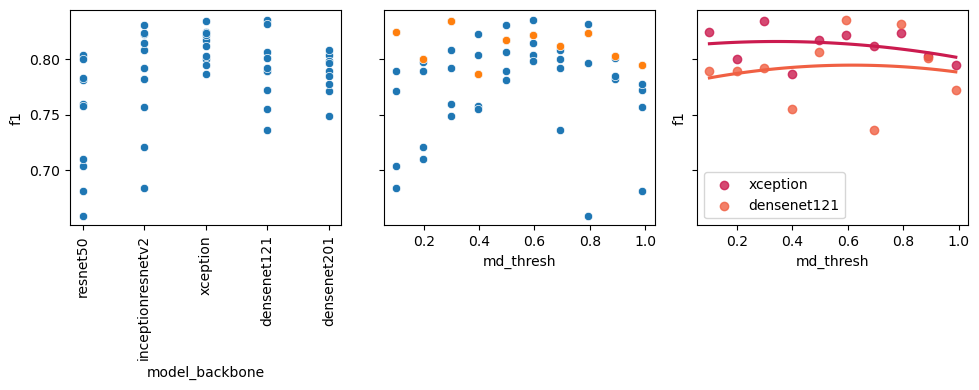

In [2]:
df_tune = pd.read_csv('results/hp_tune.csv')
df = df_tune[df_tune['phase']==1].reset_index(drop=True)

model_backbones = ['resnet50', 'inceptionresnetv2', 'xception', 'densenet121', 'densenet201']
fig, axes = plt.subplots(1,3, figsize=(10, 4), tight_layout=True, sharey=True)

ax=axes[0]
sns.scatterplot(data=df, x='model_backbone', y='f1', ax=ax)
ax.set_xticks(model_backbones)
ax.set_xticklabels(model_backbones, rotation=90)

ax=axes[1]
sns.scatterplot(data=df, x='md_thresh', y='f1', ax=ax)
sns.scatterplot(data=df[df['model_backbone']=='xception'], x='md_thresh', y='f1', ax=ax)

ax=axes[2]
for i in [2, 3]: 
    sns.regplot(
        data=df[df['model_backbone']==model_backbones[i]], x='md_thresh', y='f1',
        ax=ax, color=sns.color_palette("rocket", 5)[i], ci=0, order=2, label=model_backbones[i], 
    )
plt.legend()
plt.show()
plt.close()

### Phase 2
- define a grid of length 100 by varying `md_thresh` & `transfer_learning_rate` and randomly sampling from it 
- 100 `md_thresh` in $[0.10, 0.99]$ 
- 10 `transfer_learning_rate` $\in [10^{-5}, 10^{-3}]$
---

**Results**
- `finetune_learning_rate` = 0.001082 led to the best performance
- `transfer_learning_rate` = 0.000077 & 0.000129 led to best average performances
- for these values, performance does not vary with `md_thresh` 
- `md_thresh` can be either 0.252828 or 0.873131 
- I take `transfer_learning_rate` = 0.000077 and `md_thresh` = 0.252828

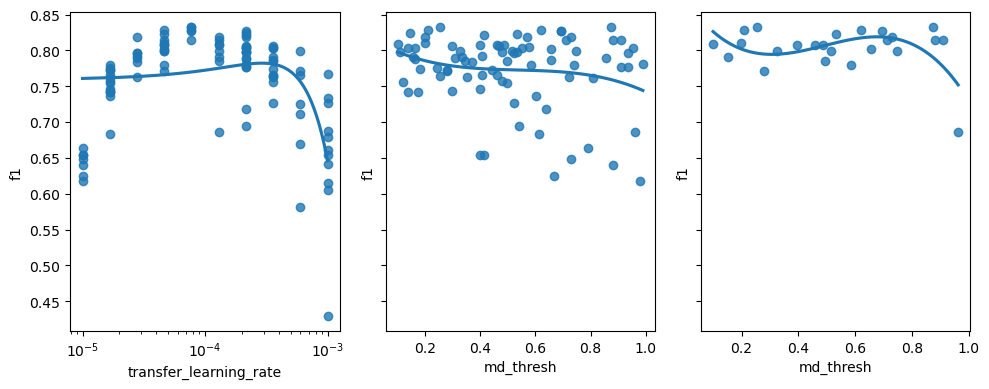

In [3]:
df_tune = pd.read_csv('results/hp_tune.csv')
df = df_tune[df_tune['phase']==2].reset_index(drop=True)

fig, axes = plt.subplots(1, 3, figsize=(10, 4), tight_layout=True, sharey=True)

ax = axes[0]
ax.set_xscale('log')
sns.regplot(data=df, x='transfer_learning_rate', y='f1', ci=0, order=2, ax=ax)

ax = axes[1]
c = df['transfer_learning_rate'] <= 5e-4
data = df[c]
sns.regplot(data=data, x='md_thresh', y='f1', ci=0, order=3, ax=ax)

ax = axes[2]
c1 = (df['transfer_learning_rate'] >= np.logspace(-5, -3, 10)[3])
c2 = (df['transfer_learning_rate'] <= np.logspace(-5, -3, 10)[5])
data = df[c1 & c2]
sns.regplot(data=data, x='md_thresh', y='f1', ci=0, order=3, ax=ax)
plt.show()
plt.close()

### Phase 3
- define a grid of length 30, over 30 `finetune_learning_rate` in $[10^{-6}, 10^{-2}]$ 
---

**Results**
- `finetune_learning_rate` = 0.001082 led to the best performance

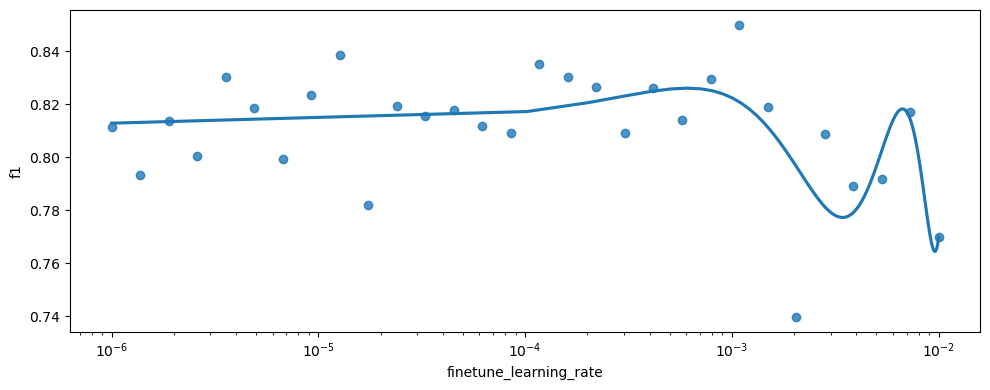

In [4]:
df_tune = pd.read_csv('results/hp_tune.csv')
df = df_tune[df_tune['phase']==3].reset_index(drop=True)

fig, axes = plt.subplots(1, 1, figsize=(10, 4), tight_layout=True, sharey=True)
ax = axes
ax.set_xscale('log')
c = df['f1'] >= .70
data = df[c]
sns.regplot(data=data, x='finetune_learning_rate', y='f1', ci=0, order=5, ax=ax)

plt.show()
plt.close()